In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt

In [34]:
cricket = pd.read_csv(r"C:\Users\akash\Downloads\Steve-Smith-All-International-Cricket-Centuries.csv")
print(cricket)

    No.   Score        Against  Position  Innings  \
0     1    138*        England         5        1   
1     2     111        England         5        1   
2     3     115        England         5        1   
3     4     100   South Africa         6        1   
4     5     101       Pakistan         3        1   
5     6     104   South Africa         4        2   
6     7    162*          India         5        1   
7     8     133          India         4        2   
8     9     192          India         4        1   
9    10     117          India         4        1   
10   11  102*          England         3        2   
11   12     105          India         3        1   
12   13     199    West Indies         3        1   
13   14     215        England         3        1   
14   15     143        England         3        1   
15   16     138    New Zealand         3        3   
16   17   134*     West Indies         4        1   
17   18     149          India         3      

In [28]:
cricket.head()

,No.,Score,Against,Position,Innings,Venue,Ground,Date,Day,Result
0,1,138*,England,5,1,"The Oval, Kennington",Away,21-Aug-13,Wednesday,Drawn
1,2,111,England,5,1,"WACA Ground, Perth",Home,13-Dec-13,Friday,Won
2,3,115,England,5,1,"Sydney Cricket Ground, Sydney",Home,03-Jan-14,Friday,Won
3,4,100,South Africa,6,1,"SuperSport Park, Centurion",Away,12-Feb-14,Wednesday,Won
4,5,101,Pakistan,3,1,"Sharjah Cricket Stadium, Sharjah",Neutral,07-Oct-14,Tuesday,Won


In [29]:
cricket.tail()

,No.,Score,Against,Position,Innings,Venue,Ground,Date,Day,Result
39,40,105,New Zealand,3,1,"Cazalys Stadium, Cairns",Home,11-Sep-22,Sunday,Won
40,41,200*,West Indies,4,1,"Perth Stadium, Perth",Home,30-Nov-22,Wednesday,Won
41,42,104,South Africa,4,1,"Sydney Cricket Ground, Sydney",Home,04-Jan-23,Wednesday,Drawn
42,43,121,India,4,1,"The Oval, Kennington",Neutral,07-Jun-23,Wednesday,Won
43,44,110,England,4,1,"Lord's, London",Away,29-Jun-23,Thursday,TBD


In [8]:
cricket.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   No.       44 non-null     int64 
 1   Score     44 non-null     object
 2   Against   44 non-null     object
 3   Position  44 non-null     int64 
 4   Innings   44 non-null     int64 
 5   Venue     44 non-null     object
 6   Ground    44 non-null     object
 7   Date      44 non-null     object
 8   Day       44 non-null     object
 9   Result    44 non-null     object
dtypes: int64(3), object(7)
memory usage: 3.6+ KB


In [35]:
cricket.describe()

,No.,Position,Innings
count,44.000000,44.000000,44.000000
mean,22.500000,3.704545,1.409091
std,12.845233,0.733882,0.658334
min,1.000000,3.000000,1.000000
25%,11.750000,3.000000,1.000000
50%,22.500000,4.000000,1.000000
75%,33.250000,4.000000,2.000000
max,44.000000,6.000000,3.000000


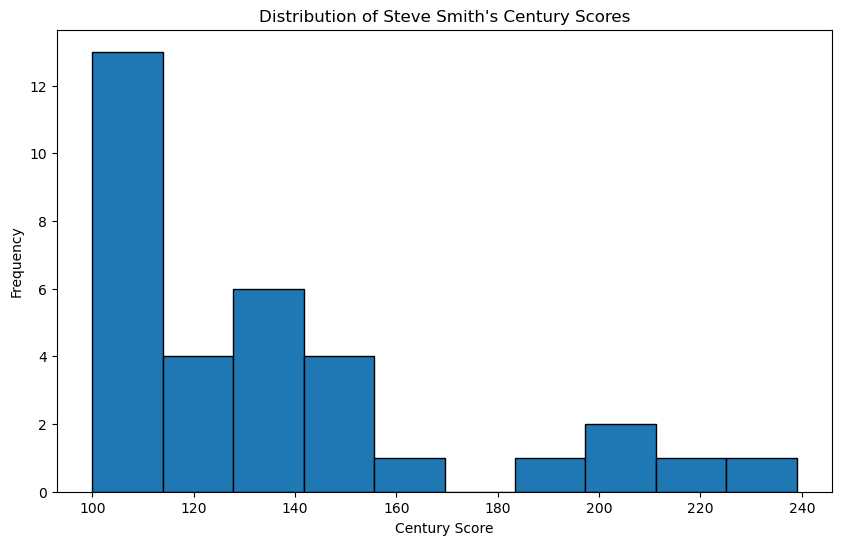

In [9]:
cricket['Score'] = pd.to_numeric(cricket['Score'], errors='coerce')

cricket = cricket.dropna(subset=['Score'])

plt.figure(figsize=(10, 6))
cricket['Score'].plot(kind='hist', bins=10, edgecolor='black')
plt.xlabel('Century Score')
plt.ylabel('Frequency')
plt.title('Distribution of Steve Smith\'s Century Scores')
plt.show()

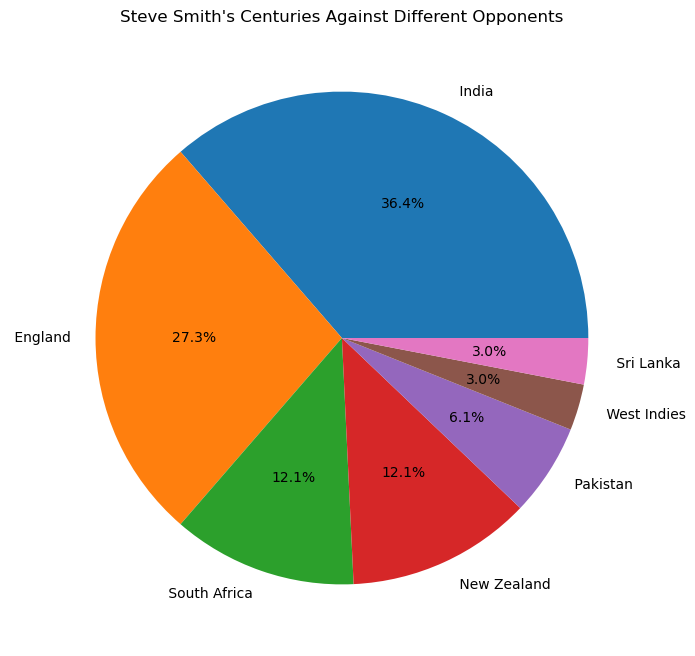

In [11]:
opponent_counts = cricket['Against'].value_counts()
plt.figure(figsize=(8, 8))
opponent_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Steve Smith\'s Centuries Against Different Opponents')
plt.ylabel('')
plt.show()

C:\Users\akash\AppData\Local\Temp\ipykernel_15516\1649087185.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cricket['Date'] = pd.to_datetime(cricket['Date'], dayfirst=True)


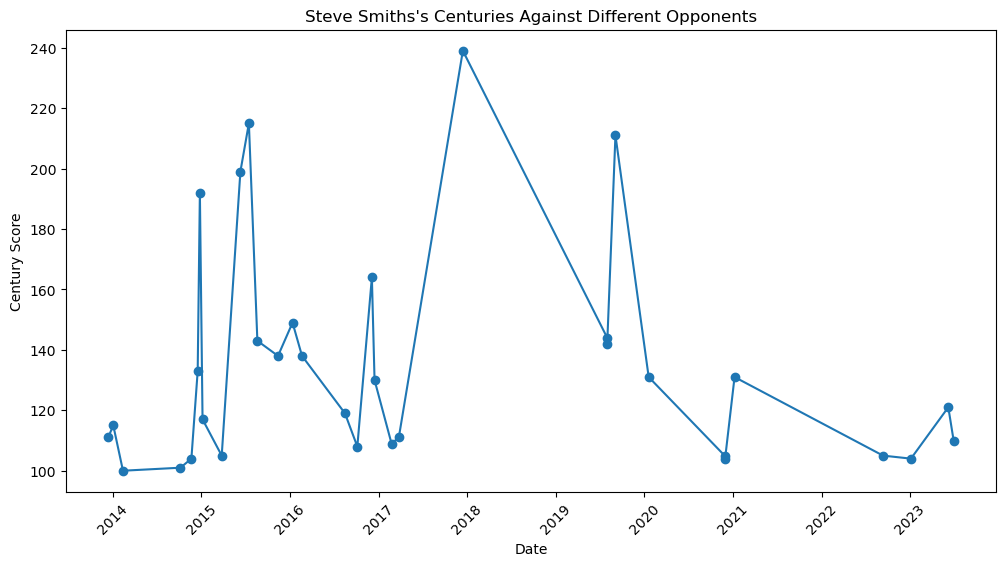

In [13]:
cricket['Date'] = pd.to_datetime(cricket['Date'], dayfirst=True)
cricket.sort_values('Date', inplace=True) 
plt.figure(figsize=(12, 6))
plt.plot(cricket['Date'], cricket['Score'], marker='o')
plt.xlabel('Date')
plt.ylabel('Century Score')
plt.title('Steve Smiths\'s Centuries Against Different Opponents')
plt.xticks(rotation=45)
plt.show()

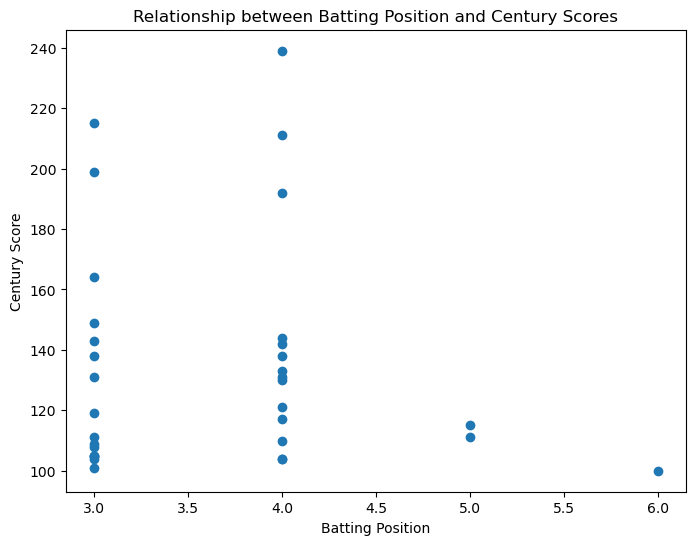

In [14]:
plt.figure(figsize=(8, 6))
plt.scatter(cricket['Position'], cricket['Score'])
plt.xlabel('Batting Position')
plt.ylabel('Century Score')
plt.title('Relationship between Batting Position and Century Scores')
plt.show()

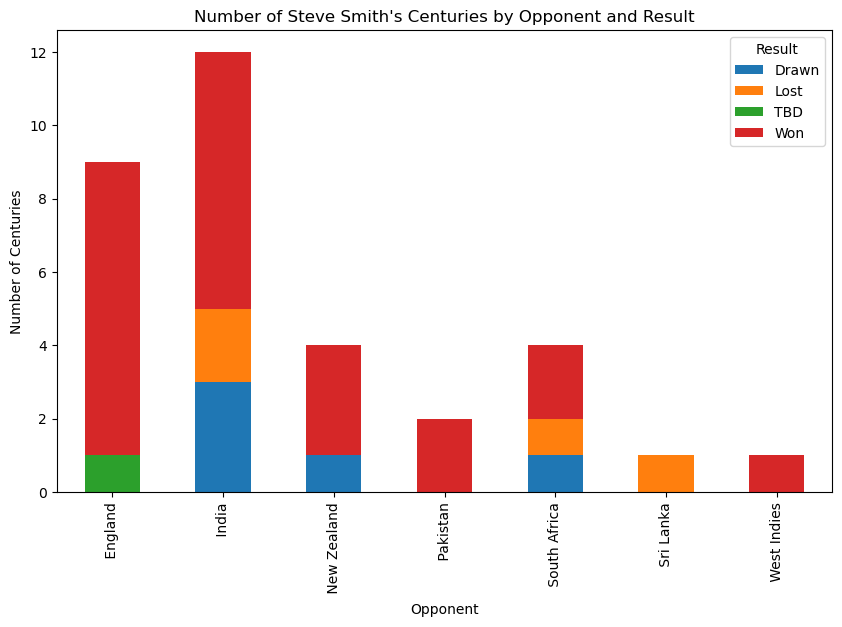

In [15]:
opponent_result = cricket.groupby(['Against', 'Result']).size().unstack()
opponent_result.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Opponent')
plt.ylabel('Number of Centuries')
plt.title("Number of Steve Smith's Centuries by Opponent and Result")
plt.legend(title='Result', loc='upper right')
plt.show()

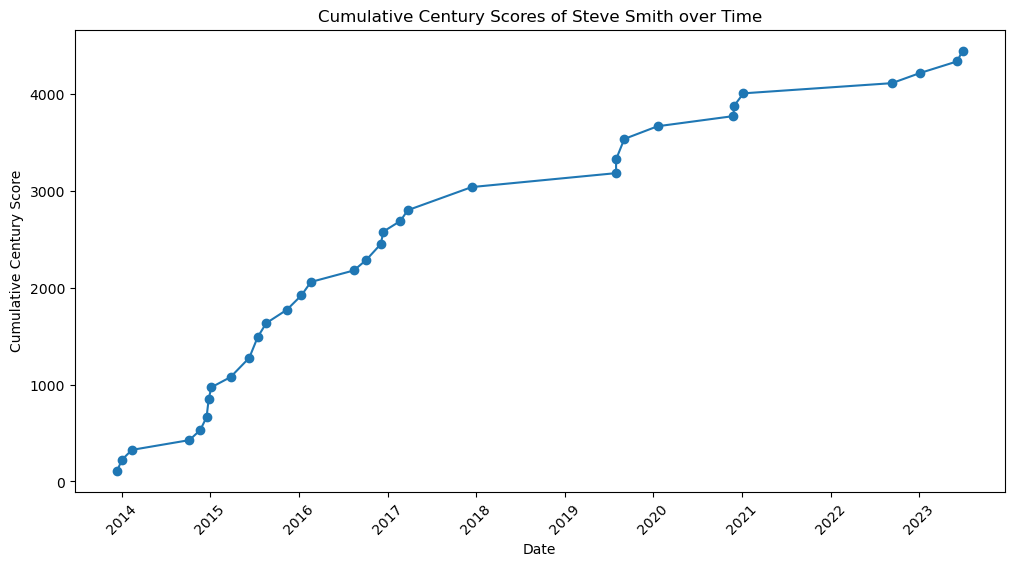

In [16]:
cricket['Cumulative Score'] = cricket['Score'].cumsum()
plt.figure(figsize=(12, 6))
plt.plot(cricket['Date'], cricket['Cumulative Score'], marker='o')
plt.xlabel('Date')
plt.ylabel('Cumulative Century Score')
plt.title("Cumulative Century Scores of Steve Smith over Time")
plt.xticks(rotation=45)
plt.show()

In [20]:
cricket= pd.DataFrame(cricket.groupby('Against')['Score'].max())
cricket=cricket.sort_values(by='Score', ascending=True)
cricket

,Score
Against,
South Africa,108.0
Sri Lanka,119.0
Pakistan,130.0
New Zealand,164.0
India,192.0
West Indies,199.0
England,239.0


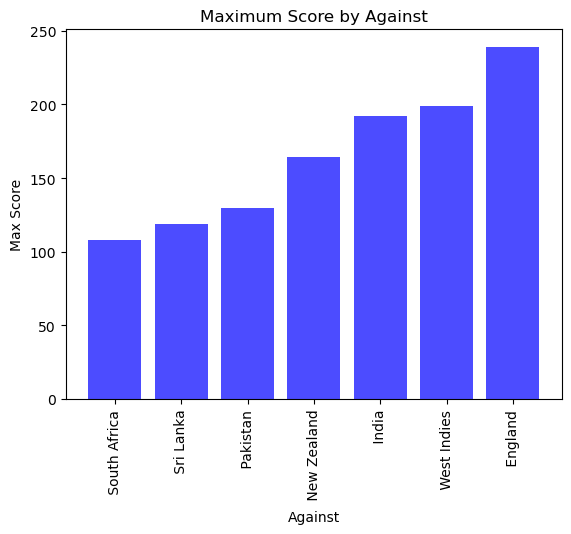

In [21]:
plt.bar(cricket.index, cricket['Score'], color='blue', alpha=0.7)

plt.xlabel('Against')
plt.ylabel('Max Score')
plt.title('Maximum Score by Against')

plt.xticks(rotation=90)

plt.show()